# Problem Set 4
# MACS 30250
# Submitted by - Nipun Thakurele

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

## Question 1(a)

In [2]:
rho = 0.85
mu = 11.4
sigma = 0.7
z_0 = mu
T = 500

In [3]:
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [4]:
Zmat = np.zeros(T + 1)
Zmat[0] = z_0
for i in range(500):
    Zmat[i + 1] = rho*Zmat[i] + (1 - rho)*mu + eps_vec[i]

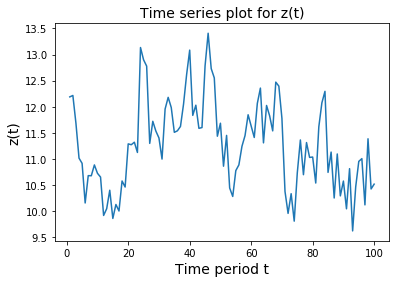

In [5]:
plt.plot(np.arange(1, 101), Zmat[1:101])
plt.xlabel("Time period t", fontsize=14)
plt.ylabel("z(t)", fontsize=14)
plt.title("Time series plot for z(t)", fontsize=14)
plt.show()

##  Question 1(b)

In [6]:
z_vals = np.linspace(mu - 3*sigma, mu + 3*sigma, 5)
print("check z_vals[2] == mu value : ", z_vals[2] ==  mu, '\n')
print('z_vals : ', z_vals)

check z_vals[2] == mu value :  True 

z_vals :  [ 9.3  10.35 11.4  12.45 13.5 ]


## Question 1(c)

In [7]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
P = np.zeros((5, 5))
z_t = z_0
bin_t = 3
for z_tp1 in Zmat:
    if z_tp1 <= z_cuts[0]:
        bin_tp1 = 1
    elif z_tp1 <= z_cuts[1]:
        bin_tp1 = 2
    elif z_tp1 <= z_cuts[2]:
        bin_tp1 = 3
    elif z_tp1 <= z_cuts[3]:
        bin_tp1 = 4
    else:
        bin_tp1 = 5
    P[bin_t - 1][bin_tp1 - 1] += 1
    bin_t = bin_tp1
    z_t = z_tp1
for i in range(5):
    P[i][:] = P[i][:] / sum(P[i][:])

print('Estimated transition matrix: ', '\n', P)

Estimated transition matrix:  
 [[0.69387755 0.26530612 0.04081633 0.         0.        ]
 [0.09166667 0.55       0.325      0.03333333 0.        ]
 [0.03030303 0.21818182 0.48484848 0.23030303 0.03636364]
 [0.         0.04201681 0.34453782 0.50420168 0.1092437 ]
 [0.         0.         0.04166667 0.35416667 0.60416667]]


## Question 1(d)

In [8]:
prob = (np.linalg.matrix_power(P, 3)[2][4])*100
print("Probability of transitioning from bin 3( at time t) to bin 5(at time t+3) is ", f'{prob:.3f}', '%')


Probability of transitioning from bin 3( at time t) to bin 5(at time t+3) is  8.032 %


## Question 1(e)

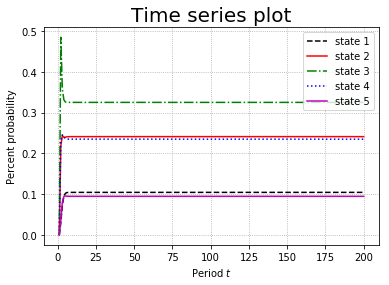

<Figure size 864x864 with 0 Axes>

In [9]:
X_0 = np.array([[0], [0], [1], [0], [0]])
Xmat = np.zeros((200, 5))
X_t = X_0
for i in range(1, 200):
    X_stat_t = np.dot(np.linalg.matrix_power(P.T, i), X_t)
    Xmat[i, :] = X_stat_t.flatten()
    X_t = X_stat_t

per_vec = np.arange(1, 201)
plt.plot(per_vec, Xmat[:, 0], 'k', linestyle='dashed', label='state 1')
plt.plot(per_vec, Xmat[:, 1], 'r', linestyle='solid', label='state 2')
plt.plot(per_vec, Xmat[:, 2], 'g', linestyle='dashdot', label='state 3')
plt.plot(per_vec, Xmat[:, 3], 'b', linestyle='dotted', label='state 4')
plt.plot(per_vec, Xmat[:, 4], 'm', linestyle='solid', label='state 5')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title('Time series plot', fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'Percent probability')
plt.legend(loc='upper right')
plt.figure(figsize=(12,12))
plt.show()

In [10]:
print('From the previous plot, we can infer that the steady state is reached before time period 25', '\n')
X_0 = np.array([[0], [0], [1], [0], [0]])
X_stat = np.dot(np.linalg.matrix_power(P.T, 25), X_0)
print("The stationary distribution of z(t) is : ")
print(X_stat)

From the previous plot, we can infer that the steady state is reached before time period 25 

The stationary distribution of z(t) is : 
[[0.10432892]
 [0.24103477]
 [0.32507343]
 [0.23486618]
 [0.09469669]]


## Question 1(f)

In [11]:
Z_mat = np.zeros(T  + 1)
bin_init = 2
Z_mat[0] = z_vals[bin_init]
for t in range(T):
    bin_t = np.argwhere(unif_vec[t] <= np.cumsum(P[bin_init, :])).min()
    Z_mat[t + 1] = z_vals[bin_t]
    bin_init = bin_t

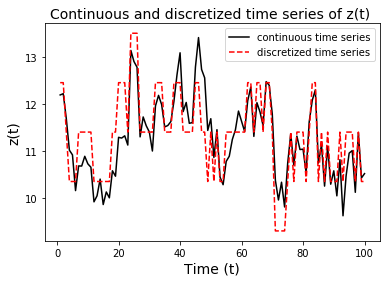

<Figure size 864x720 with 0 Axes>

In [12]:
plt.plot(np.arange(1,101), Zmat[1:101], 'k',label = 'continuous time series')
plt.plot(np.arange(1,101), Z_mat[1:101],'r',linestyle='dashed', label = 'discretized time series')
plt.xlabel('Time (t)', fontsize=14)
plt.ylabel('z(t)', fontsize=14)
plt.title('Continuous and discretized time series of z(t) ', fontsize=14)
plt.legend(loc='upper right')
plt.figure(figsize=(12,10))
plt.show()